In [1]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier



In [4]:
def load_data(train_size:float): 
    """
    train_size is for selecting the training part of dataset, portion between 0 and 1 (0,1)
    
    :param train_size: 
    :return: 
    """
    
    dataset = datasets.load_iris()
    X, y = dataset.data, dataset.target 
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = (1-train_size), random_state=1234)
    return X_train, X_test, y_train, y_test

    

In [20]:
X_train, X_test, y_train, y_test = load_data(train_size=0.71)  ## 0.8 worked optimally 


In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(106, 4) (106,)
(44, 4) (44,)


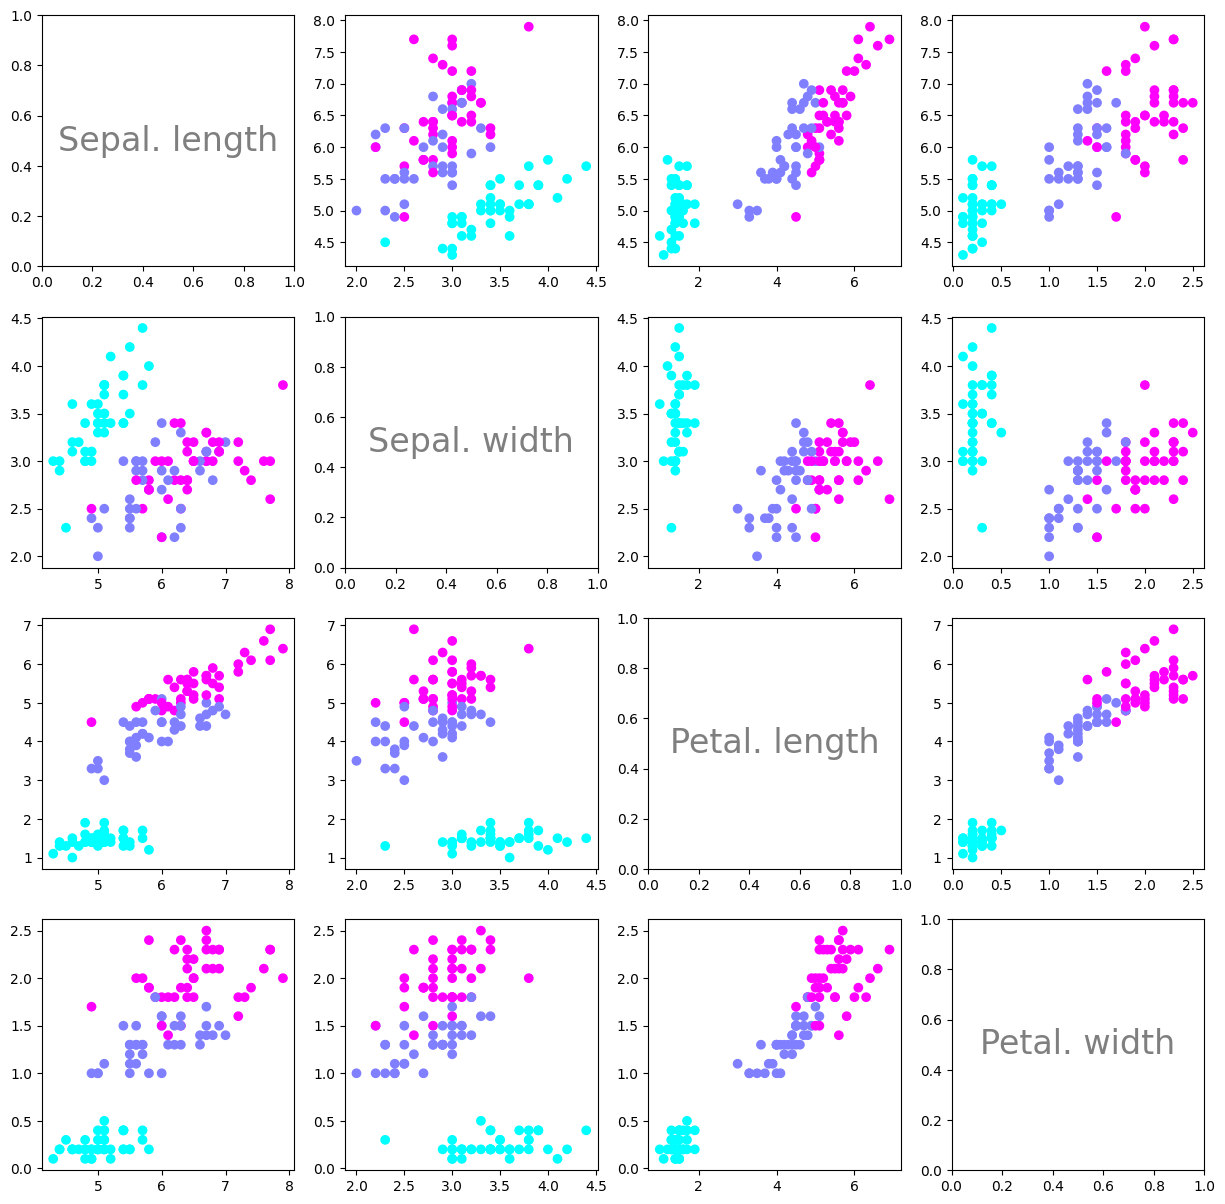

In [8]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(X_train[:,j],X_train[:,i], c=y_train, cmap=plt.cm.cool)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [11]:
y_pred 

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

In [14]:
def acc(arr1, arr2):
    return np.sum(arr1 == arr2) / len(arr1)
    #return np.mean(arr1 == arr2)

In [15]:
acc(y_pred, y_test)

np.float64(1.0)

In [18]:
for k in range(3,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(k, acc(y_pred, y_test))
    
    

3 1.0
4 1.0
5 0.9666666666666667
6 1.0
7 0.9666666666666667
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0


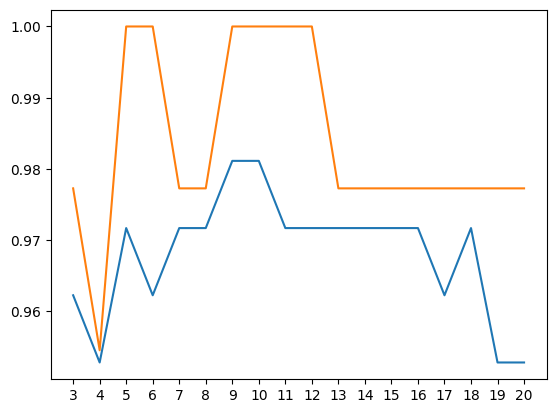

In [23]:
train_accuracies = []
val_accuracies = []

for k in range(3,21):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_accuracy = acc(y_train_pred, y_train)
    y_val_pred = knn.predict(X_test)
    val_accuracy = acc(y_val_pred, y_test)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

plt.plot(range(3,21), train_accuracies)
plt.plot(range(3,21), val_accuracies)
plt.xticks(range(3,21))
plt.show()

In [24]:
from KNNalgo import KNN 

train_accuracies = []
val_accuracies = []

for k in range(3,21):
    knn = KNN(k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    train_accuracy = acc(y_train_pred, y_train)
    y_val_pred = knn.predict(X_test)
    val_accuracy = acc(y_val_pred, y_test)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

plt.plot(range(3,21), train_accuracies)
plt.plot(range(3,21), val_accuracies)
plt.xticks(range(3,21))
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (106,) + inhomogeneous part.

In [33]:
from KNNalgo import KNN 

knn2 = KNN(3)
knn2.fit(X_train, y_train)

y_test_pred = knn2.predict(X_test)

y_test_pred

[[(np.int64(1), 3)],
 [(np.int64(1), 2), (np.int64(2), 1)],
 [(np.int64(2), 3)],
 [(np.int64(0), 3)],
 [(np.int64(1), 3)],
 [(np.int64(0), 3)],
 [(np.int64(0), 3)],
 [(np.int64(0), 3)],
 [(np.int64(1), 3)],
 [(np.int64(2), 3)],
 [(np.int64(1), 3)],
 [(np.int64(0), 3)],
 [(np.int64(2), 3)],
 [(np.int64(1), 3)],
 [(np.int64(0), 3)],
 [(np.int64(1), 3)],
 [(np.int64(2), 3)],
 [(np.int64(0), 3)],
 [(np.int64(2), 3)],
 [(np.int64(1), 3)],
 [(np.int64(1), 3)],
 [(np.int64(1), 3)],
 [(np.int64(1), 3)],
 [(np.int64(1), 3)],
 [(np.int64(2), 3)],
 [(np.int64(0), 3)],
 [(np.int64(2), 2), (np.int64(1), 1)],
 [(np.int64(1), 3)],
 [(np.int64(2), 3)],
 [(np.int64(0), 3)],
 [(np.int64(1), 3)],
 [(np.int64(2), 3)],
 [(np.int64(0), 3)],
 [(np.int64(1), 2), (np.int64(2), 1)],
 [(np.int64(1), 2), (np.int64(2), 1)],
 [(np.int64(0), 3)],
 [(np.int64(0), 3)],
 [(np.int64(0), 3)],
 [(np.int64(0), 3)],
 [(np.int64(1), 3)],
 [(np.int64(0), 3)],
 [(np.int64(1), 2), (np.int64(2), 1)],
 [(np.int64(0), 3)],
 [(np.i

In [35]:
knn3 = KNN(3)

knn3.fit(X_train, y_train)
preds = knn3.predict(X_test)
print(preds, type(preds))

[[(np.int64(1), 3)], [(np.int64(1), 2), (np.int64(2), 1)], [(np.int64(2), 3)], [(np.int64(0), 3)], [(np.int64(1), 3)], [(np.int64(0), 3)], [(np.int64(0), 3)], [(np.int64(0), 3)], [(np.int64(1), 3)], [(np.int64(2), 3)], [(np.int64(1), 3)], [(np.int64(0), 3)], [(np.int64(2), 3)], [(np.int64(1), 3)], [(np.int64(0), 3)], [(np.int64(1), 3)], [(np.int64(2), 3)], [(np.int64(0), 3)], [(np.int64(2), 3)], [(np.int64(1), 3)], [(np.int64(1), 3)], [(np.int64(1), 3)], [(np.int64(1), 3)], [(np.int64(1), 3)], [(np.int64(2), 3)], [(np.int64(0), 3)], [(np.int64(2), 2), (np.int64(1), 1)], [(np.int64(1), 3)], [(np.int64(2), 3)], [(np.int64(0), 3)], [(np.int64(1), 3)], [(np.int64(2), 3)], [(np.int64(0), 3)], [(np.int64(1), 2), (np.int64(2), 1)], [(np.int64(1), 2), (np.int64(2), 1)], [(np.int64(0), 3)], [(np.int64(0), 3)], [(np.int64(0), 3)], [(np.int64(0), 3)], [(np.int64(1), 3)], [(np.int64(0), 3)], [(np.int64(1), 2), (np.int64(2), 1)], [(np.int64(0), 3)], [(np.int64(2), 3)]] <class 'list'>


In [34]:
y_test_pred.shape

AttributeError: 'list' object has no attribute 'shape'